In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from linearmodels.panel import PanelOLS, PooledOLS

In [2]:
revenue= pd.read_excel('NetIncome.xlsx')
revenue.head().iloc[:, -19:]

,Price,Market Cap ▾,Volume,% (1D),% (1M),% (6M),Sector,Backed by VC or not,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,216.77,702420000000,40.31M,-0.0156,0.1042,0.1832,Automotive / Technology,1,-154.328,-254.411,-396.213,-74.014,-294.040,-888.663,-674.914,-1962.000,-976.000,-862.000,690.00
1,393.45,64320000000,68084,0.0202,0.0205,0.2024,Technology / Communication Equipment,0,633.000,1158.000,881.000,1099.000,1299.000,610.000,560.000,-155.000,966.000,868.000,949.00
2,251.11,63280000000,516.49K,0.0148,-0.0621,0.1692,Technology / Semiconductors,1,-456.000,390.000,-115.000,348.000,539.000,1526.000,200.000,2215.000,2208.000,243.000,52.00
3,72.24,16820000000,930.04K,0.0637,0.1673,0.1793,Technology / Software,1,32.413,51.021,45.820,117.895,131.127,42.862,131.000,328.900,103.200,438.500,625.20
4,100.00,9020000000,105.13K,0.0131,0.0475,0.2210,Industrials / Nuclear Technology,0,139.939,78.319,227.695,346.078,29.388,131.465,183.057,147.844,226.958,244.115,278.67


In [3]:
revenue.columns = ['Index', 'Symbol', 'Price', 'Market Cap', 'Volume', '1D%', '1M%','6M%','Sector', 'VC', '2010',                
'2011','2012', '2013','2014', '2015', '2016', '2017', '2018', '2019','2020' ]
revenue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Index       30 non-null     int64  
 1   Symbol      30 non-null     object 
 2   Price       30 non-null     float64
 3   Market Cap  30 non-null     int64  
 4   Volume      30 non-null     object 
 5   1D%         30 non-null     float64
 6   1M%         30 non-null     float64
 7   6M%         30 non-null     float64
 8   Sector      30 non-null     object 
 9   VC          30 non-null     int64  
 10  2010        30 non-null     float64
 11  2011        30 non-null     float64
 12  2012        30 non-null     float64
 13  2013        30 non-null     float64
 14  2014        30 non-null     float64
 15  2015        30 non-null     float64
 16  2016        30 non-null     float64
 17  2017        30 non-null     float64
 18  2018        30 non-null     float64
 19  2019        30 non-null     flo

In [4]:
revenue.describe()

,Index,Price,Market Cap,1D%,1M%,6M%,VC,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
count,30.000000,30.000000,3.000000e+01,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,43.600000,83.981717,3.188685e+10,0.006827,0.074627,0.055480,0.666667,29.043700,70.953200,51.678400,83.178200,99.534767,87.470667,56.643933,89.683900,168.185633,133.070033,172.404467
std,32.188668,107.724922,1.276533e+11,0.039631,0.142125,0.289288,0.479463,163.439054,229.332798,201.462191,229.736835,269.629936,353.827893,197.031531,570.952939,498.898665,302.425300,272.822236
min,1.000000,0.527500,3.660000e+06,-0.142700,-0.153600,-0.703000,0.000000,-456.000000,-254.411000,-396.213000,-272.812000,-294.040000,-888.663000,-674.914000,-1962.000000,-976.000000,-862.000000,-110.195000
25%,18.500000,5.207500,4.568375e+08,0.000525,-0.006900,-0.039800,0.000000,-4.086750,1.022250,-6.816000,-9.489250,-7.610250,-9.562500,-14.438250,-11.934250,-9.792750,-11.496250,-7.429250
50%,35.000000,17.260000,3.295000e+09,0.008400,0.048800,0.066300,1.000000,10.504500,18.871500,3.609000,15.170000,33.619500,12.968000,3.360500,6.715500,35.274000,56.894000,29.914500
75%,64.250000,168.055000,8.412500e+09,0.021625,0.119375,0.182375,1.000000,54.408250,63.575500,110.586750,146.545750,166.128750,119.130750,170.042750,188.974000,219.828500,273.064250,268.712500
max,109.000000,393.450000,7.024200e+11,0.105000,0.538700,0.784500,1.000000,633.000000,1158.000000,881.000000,1099.000000,1299.000000,1526.000000,560.000000,2215.000000,2208.000000,868.000000,949.000000


In [5]:
#Non VC companies
nonvc= revenue[revenue['VC']==0]
nonvc.describe()

,Index,Price,Market Cap,1D%,1M%,6M%,VC,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
count,10.000000,10.000000,1.000000e+01,10.000000,10.000000,10.000000,10.0,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,28.400000,137.351000,1.338166e+10,0.004480,0.040990,0.048410,0.0,136.890800,188.876100,213.862000,234.213300,228.011000,173.656600,187.710700,171.839700,313.342300,341.744200,352.570000
std,20.876356,126.864753,1.932862e+10,0.011613,0.081413,0.101801,0.0,192.553433,345.091398,249.852768,318.849647,384.448483,177.876845,168.365256,186.772991,285.604851,291.617147,310.295813
min,3.000000,12.280000,4.397300e+08,-0.024300,-0.153600,-0.077700,0.0,-56.862000,10.090000,3.991000,3.508000,15.430000,11.856000,-16.007000,-155.000000,13.010000,19.498000,6.364000
25%,12.500000,26.562500,1.602500e+09,0.002300,0.024700,-0.025900,0.0,20.902500,41.476750,100.238250,76.113500,49.194500,49.098750,107.340500,43.093250,89.067750,85.260000,72.641500
50%,21.500000,103.630000,7.315000e+09,0.006200,0.048800,0.021050,0.0,112.763500,78.211500,153.586000,164.979500,118.481500,150.124500,183.978500,175.264000,274.579500,304.426000,331.581500
75%,44.250000,222.460000,1.700750e+10,0.009100,0.094275,0.099750,0.0,141.398500,148.359250,214.222750,185.239500,185.804750,200.149750,212.543250,322.407000,435.119250,513.085000,471.230000
max,65.000000,393.450000,6.432000e+10,0.020200,0.139900,0.221000,0.0,633.000000,1158.000000,881.000000,1099.000000,1299.000000,610.000000,560.000000,423.049000,966.000000,868.000000,949.000000


In [6]:
#VC companies
vc= revenue[revenue['VC']==1]
vc.describe()

,Index,Price,Market Cap,1D%,1M%,6M%,VC,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
count,20.000000,20.000000,2.000000e+01,20.00000,20.000000,20.000000,20.0,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,51.200000,57.297075,4.113944e+10,0.00800,0.091445,0.059015,1.0,-24.879850,11.991750,-29.413400,7.66065,35.296650,44.377700,-8.889450,48.606000,95.607300,28.732950,82.321700
std,34.533889,88.543451,1.562835e+11,0.04826,0.163701,0.350407,0.0,118.432976,113.516198,107.760202,119.96304,167.097657,412.594447,179.622719,689.715026,569.760264,254.830402,205.846326
min,1.000000,0.527500,3.660000e+06,-0.14270,-0.116200,-0.703000,1.0,-456.000000,-254.411000,-396.213000,-272.81200,-294.040000,-888.663000,-674.914000,-1962.000000,-976.000000,-862.000000,-110.195000
25%,22.500000,1.917500,2.585300e+08,-0.00095,-0.011575,-0.058900,1.0,-9.130750,-5.426250,-60.506250,-47.82025,-21.476500,-18.667750,-21.813500,-21.760000,-15.199250,-18.638500,-20.513000
50%,50.000000,10.155000,1.045000e+09,0.01475,0.063600,0.102050,1.0,1.603500,5.376000,-1.529000,-2.01450,-1.417500,-5.147500,-5.493500,-4.208000,4.235000,-0.196500,20.443500
75%,77.250000,64.485000,6.612500e+09,0.02545,0.151025,0.198500,1.0,17.577000,33.165750,5.670500,28.37000,68.387250,38.700250,46.072750,88.694000,88.925250,105.161500,65.544000
max,109.000000,251.110000,7.024200e+11,0.10500,0.538700,0.784500,1.0,130.050000,390.000000,177.481000,348.00000,539.000000,1526.000000,262.434000,2215.000000,2208.000000,438.500000,690.000000


In [7]:
corr= revenue[['VC', 'Market Cap','Price', '2010','2011','2012', '2013','2014', '2015', '2016', '2017', '2018', '2019','2020']].corr()
corr

,VC,Market Cap,Price,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
VC,1.000000,0.104258,-0.356305,-0.474569,-0.369810,-0.578975,-0.472818,-0.342690,-0.175183,-0.478414,-0.103487,-0.209253,-0.496246,-0.474940
Market Cap,0.104258,1.000000,0.327445,-0.194641,-0.161335,-0.355447,-0.026324,-0.168528,-0.424779,-0.632629,-0.617047,-0.331377,-0.553732,0.421687
Price,-0.356305,0.327445,1.000000,0.258654,0.645503,0.404929,0.681779,0.615806,0.363387,0.322913,0.104612,0.440565,0.359585,0.677158
2010,-0.474569,-0.194641,0.258654,1.000000,0.580278,0.834330,0.603884,0.522802,-0.046013,0.554003,-0.221871,-0.032362,0.525959,0.459195
2011,-0.369810,-0.161335,0.645503,0.580278,1.000000,0.822330,0.924177,0.943601,0.630614,0.724583,0.328631,0.654683,0.684566,0.492725
2012,-0.578975,-0.355447,0.404929,0.834330,0.822330,1.000000,0.845880,0.808722,0.423858,0.844163,0.207033,0.435418,0.820332,0.518729
2013,-0.472818,-0.026324,0.681779,0.603884,0.924177,0.845880,1.000000,0.886519,0.583163,0.714171,0.264270,0.629886,0.671393,0.619077
2014,-0.342690,-0.168528,0.615806,0.522802,0.943601,0.808722,0.886519,1.000000,0.683480,0.756528,0.395415,0.701343,0.724762,0.524236
2015,-0.175183,-0.424779,0.363387,-0.046013,0.630614,0.423858,0.583163,0.683480,1.000000,0.724734,0.910376,0.989613,0.631664,0.058995
2016,-0.478414,-0.632629,0.322913,0.554003,0.724583,0.844163,0.714171,0.756528,0.724734,1.000000,0.648427,0.718766,0.951697,0.303858


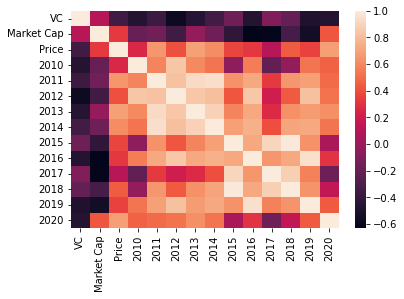

In [8]:
#Correlation heatmap
import seaborn as sns
sns.heatmap(corr);

In [9]:
reg= revenue[['VC', '2010','2011','2012', '2013','2014', '2015', '2016', '2017', '2018', '2019','2020']]
reg.head()

,VC,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,1,-154.328,-254.411,-396.213,-74.014,-294.040,-888.663,-674.914,-1962.000,-976.000,-862.000,690.00
1,0,633.000,1158.000,881.000,1099.000,1299.000,610.000,560.000,-155.000,966.000,868.000,949.00
2,1,-456.000,390.000,-115.000,348.000,539.000,1526.000,200.000,2215.000,2208.000,243.000,52.00
3,1,32.413,51.021,45.820,117.895,131.127,42.862,131.000,328.900,103.200,438.500,625.20
4,0,139.939,78.319,227.695,346.078,29.388,131.465,183.057,147.844,226.958,244.115,278.67


In [10]:
df_long = reg.melt(id_vars=['VC'], var_name='Year', value_name='Value')
df_long['Year'] = df_long['Year'].astype(int)
year = df_long.Year
df_long = df_long.set_index([df_long.index, 'Year'])
df_long['Year'] = pd.Categorical(year)
df_long

,,VC,Value,Year
,Year,,,
0,2010,1,-154.328,2010
1,2010,0,633.000,2010
2,2010,1,-456.000,2010
3,2010,1,32.413,2010
4,2010,0,139.939,2010
...,...,...,...,...
325,2020,0,472.640,2020
326,2020,0,384.493,2020
327,2020,0,467.000,2020


# Pooled Regression

In [11]:
exog_vars = ['Year', 'VC']
exog = sm.add_constant(df_long[exog_vars])
mod = PooledOLS(df_long['Value'], exog)
pooled_res = mod.fit()
print(pooled_res)

                          PooledOLS Estimation Summary                          
Dep. Variable:                  Value   R-squared:                        0.1092
Estimator:                  PooledOLS   R-squared (Between):              0.1092
No. Observations:                 330   R-squared (Within):               0.0000
Date:                Sat, Aug 17 2024   R-squared (Overall):              0.1092
Time:                        15:33:07   Log-likelihood                   -2353.7
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      3.5429
Entities:                         330   P-value                           0.0001
Avg Obs:                       1.0000   Distribution:                  F(11,318)
Min Obs:                       1.0000                                           
Max Obs:                       1.0000   F-statistic (robust):             3.5429
                            

In [12]:
#Saving Results locally 
df_long.to_csv(r'NetIncome_PanelData.csv')

# Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression
# Prepare the features and target
X = df_long[['Year', 'Value']]  # Features
y = df_long['VC']  # Target

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=877)

# Create and fit the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the model's coefficients and evaluation metrics
print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC AUC: {roc_auc}')
print('Confusion Matrix:\n', conf_matrix)

# Cross-validation scores
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print('Cross-Validation Accuracy Scores:', cv_scores)
print('Mean Cross-Validation Accuracy:', cv_scores.mean())

Intercept: [2.12609917e-07]
Coefficients: [[ 0.00048457 -0.00321329]]
Accuracy: 0.7349397590361446
Precision: 0.7464788732394366
Recall: 0.9298245614035088
F1 Score: 0.8281249999999999
ROC AUC: 0.849527665317139
Confusion Matrix:
 [[ 8 18]
 [ 4 53]]
Cross-Validation Accuracy Scores: [0.71212121 0.68181818 0.66666667 0.72727273 0.75757576]
Mean Cross-Validation Accuracy: 0.7090909090909092


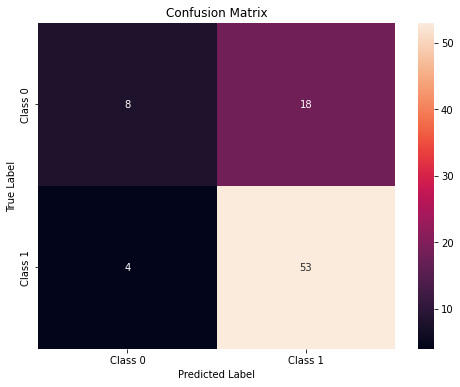

In [15]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Plot confusion matrix
plt.figure(figsize=(8, 6))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', 
            xticklabels=['Class 0', 'Class 1'], 
            yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


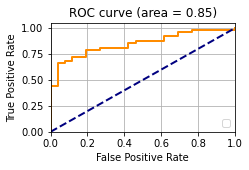

In [16]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(3.3, 2)) 
plt.plot(fpr, tpr, color='darkorange', lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve (area = 0.85)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

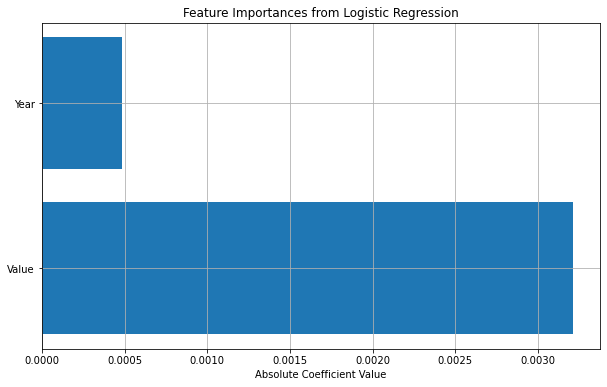

In [17]:
coefficients = model.coef_[0]
features = X.columns
feature_importances = np.abs(model.coef_[0])
sorted_idx = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [features[i] for i in sorted_idx])
plt.title('Feature Importances from Logistic Regression')
plt.xlabel('Absolute Coefficient Value')
plt.grid(True)
plt.show()

# Exploratory Data Analysis

In [18]:
ones= revenue[revenue['VC']==1]
ones= ones[['Symbol','2010','2011','2012', '2013','2014', '2015', '2016', '2017', '2018', '2019','2020']]
df =ones
df.iloc[:, -11:]

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,-154.328,-254.411,-396.213,-74.014,-294.040,-888.663,-674.914,-1962.000,-976.000,-862.000,690.000
2,-456.000,390.000,-115.000,348.000,539.000,1526.000,200.000,2215.000,2208.000,243.000,52.000
3,32.413,51.021,45.820,117.895,131.127,42.862,131.000,328.900,103.200,438.500,625.200
5,44.323,64.329,-56.467,68.969,91.731,43.642,61.897,97.115,84.167,120.955,113.479
6,2.884,13.703,1.222,1.510,2.704,4.639,4.963,0.351,23.872,33.712,45.586
7,130.050,6.474,177.481,188.125,283.749,347.696,262.434,408.357,598.995,282.714,164.286
8,5.795,4.278,3.227,1.990,6.814,6.015,1.758,2.010,2.715,4.058,-8.869
9,-1.048,7.605,0.465,3.660,14.174,4.436,-55.567,-3.280,5.755,-16.782,-3.110
10,-52.981,-64.852,-72.624,-272.812,189.618,-142.669,-81.708,-116.937,-282.368,21.505,106.176
11,-140.166,-109.388,-94.465,-79.293,-66.160,-31.696,-74.375,-92.189,-102.562,-84.134,29.403


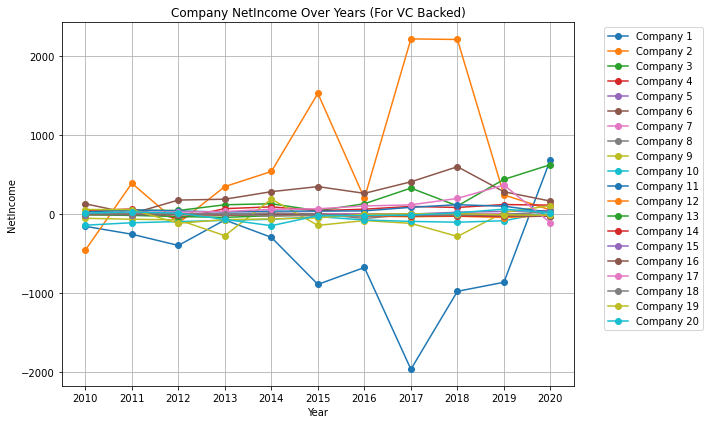

In [19]:
company_labels = {symbol: f'Company {i+1}' for i, symbol in enumerate(df['Symbol'])}
df['Symbol'] = df['Symbol'].replace(company_labels)

# Set the 'Symbol' column as the index
df.set_index('Symbol', inplace=True)

# Transpose the DataFrame to have years as rows and symbols as columns
df = df.transpose()

# Plotting the data
plt.figure(figsize=(10, 6))
for column in df.columns:
    plt.plot(df.index, df[column], marker='o', label=column)

plt.xlabel('Year')
plt.ylabel('NetIncome')
plt.title(r'Company NetIncome Over Years (For VC Backed)')

# Move the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()  # Adjust the layout to make room for the legend

plt.show()

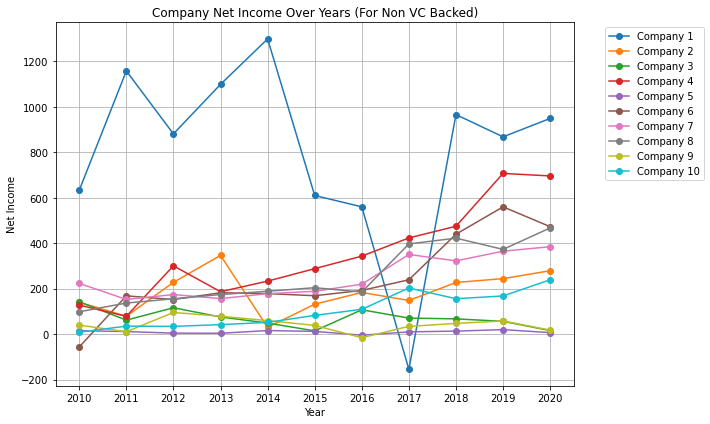

In [20]:
ones= revenue[revenue['VC']==0]
ones= ones[['Symbol','2010','2011','2012', '2013','2014', '2015', '2016', '2017', '2018', '2019','2020']]
df =ones
df
company_labels = {symbol: f'Company {i+1}' for i, symbol in enumerate(df['Symbol'])}
df['Symbol'] = df['Symbol'].replace(company_labels)

# Set the 'Symbol' column as the index
df.set_index('Symbol', inplace=True)

# Transpose the DataFrame to have years as rows and symbols as columns
df = df.transpose()

# Plotting the data
plt.figure(figsize=(10, 6))
for column in df.columns:
    plt.plot(df.index, df[column], marker='o', label=column)

plt.xlabel('Year')
plt.ylabel('Net Income')
plt.title(r'Company Net Income Over Years (For Non VC Backed)')

# Move the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()  # Adjust the layout to make room for the legend

plt.show()